In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split# to split the data into train and test
from sklearn.svm import SVR# feature selection
from sklearn.preprocessing import normalize# to normalize the data
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Data loading
Forest = pd.read_csv("forestfires.csv")
Forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [ ]:
"""**DATA UNDERSTANDING**

The dataset contains the data related to the factors which results in fire in the forest.

month: Month in the year

day: Days of the week

FFMC: Fine Fuel moisture code(a numerical rating of the moisture content of litter and cured fine fuels and is derived from temperature, relative humidity, wind and rain.

DMC: Duff moisture code(a numeric rating of average moisture content of loosely compacted organic layers of moderate depth.)

DC: Drought code(respresents the drying deep into the soil)

ISI: Initial spread index(a numeric rating of the expected rate of fire spread. It is based on wind speed)

temp: Temperature of the particular area

RH: Relative humidity

wind: The speed of the wind

rain: The quanity of rain

Area: The area affected by the fire
"""

In [3]:
Forest = Forest.iloc[:,2:]

In [4]:
Forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [5]:
Forest.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [6]:
Forest = Forest.replace(" ","_",regex = True)

In [7]:
Forest

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


array([[<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>,
        <AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'dayfri'}>],
       [<AxesSubplot:title={'center':'daymon'}>,
        <AxesSubplot:title={'center':'daysat'}>,
        <AxesSubplot:title={'center':'daysun'}>,
        <AxesSubplot:title={'center':'daythu'}>,
        <AxesSubplot:title={'center':'daytue'}>],
       [<AxesSubplot:title={'center':'daywed'}>,
        <AxesSubplot:title={'center':'monthapr'}>,
        <AxesSubplot:title={'center':'monthaug'}>,
        <AxesSubplot:title={'center':'monthdec'}>,
        <AxesSubplot:title={'center':'monthfeb'}>],
       [<AxesSubplot:title={'cen

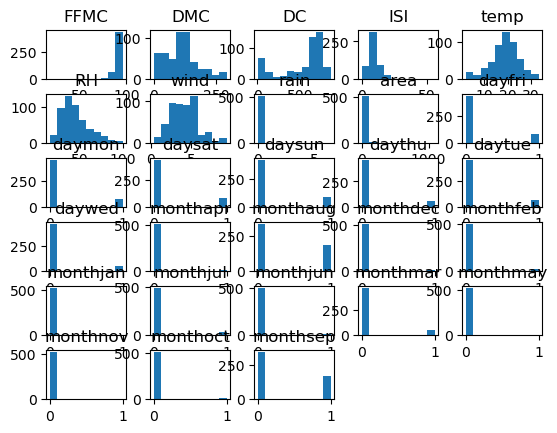

In [8]:
# Histogram
Forest.hist(grid = False)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(1, 0, 'FFMC'),
  Text(2, 0, 'DMC'),
  Text(3, 0, 'DC'),
  Text(4, 0, 'ISI'),
  Text(5, 0, 'temp'),
  Text(6, 0, 'RH'),
  Text(7, 0, 'wind'),
  Text(8, 0, 'rain'),
  Text(9, 0, 'area'),
  Text(10, 0, 'dayfri'),
  Text(11, 0, 'daymon'),
  Text(12, 0, 'daysat'),
  Text(13, 0, 'daysun'),
  Text(14, 0, 'daythu'),
  Text(15, 0, 'daytue'),
  Text(16, 0, 'daywed'),
  Text(17, 0, 'monthapr'),
  Text(18, 0, 'monthaug'),
  Text(19, 0, 'monthdec'),
  Text(20, 0, 'monthfeb'),
  Text(21, 0, 'monthjan'),
  Text(22, 0, 'monthjul'),
  Text(23, 0, 'monthjun'),
  Text(24, 0, 'monthmar'),
  Text(25, 0, 'monthmay'),
  Text(26, 0, 'monthnov'),
  Text(27, 0, 'monthoct'),
  Text(28, 0, 'monthsep')])

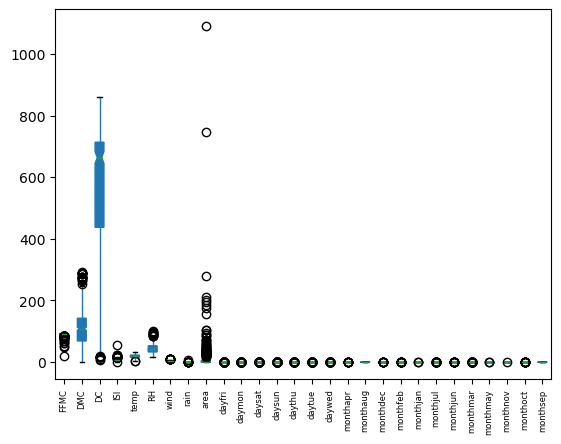

In [9]:
# Boxplot
Forest.boxplot(notch = True, patch_artist = True, grid = False);plt.xticks(fontsize=6, rotation = 90)
# we can see the presence of the outliers

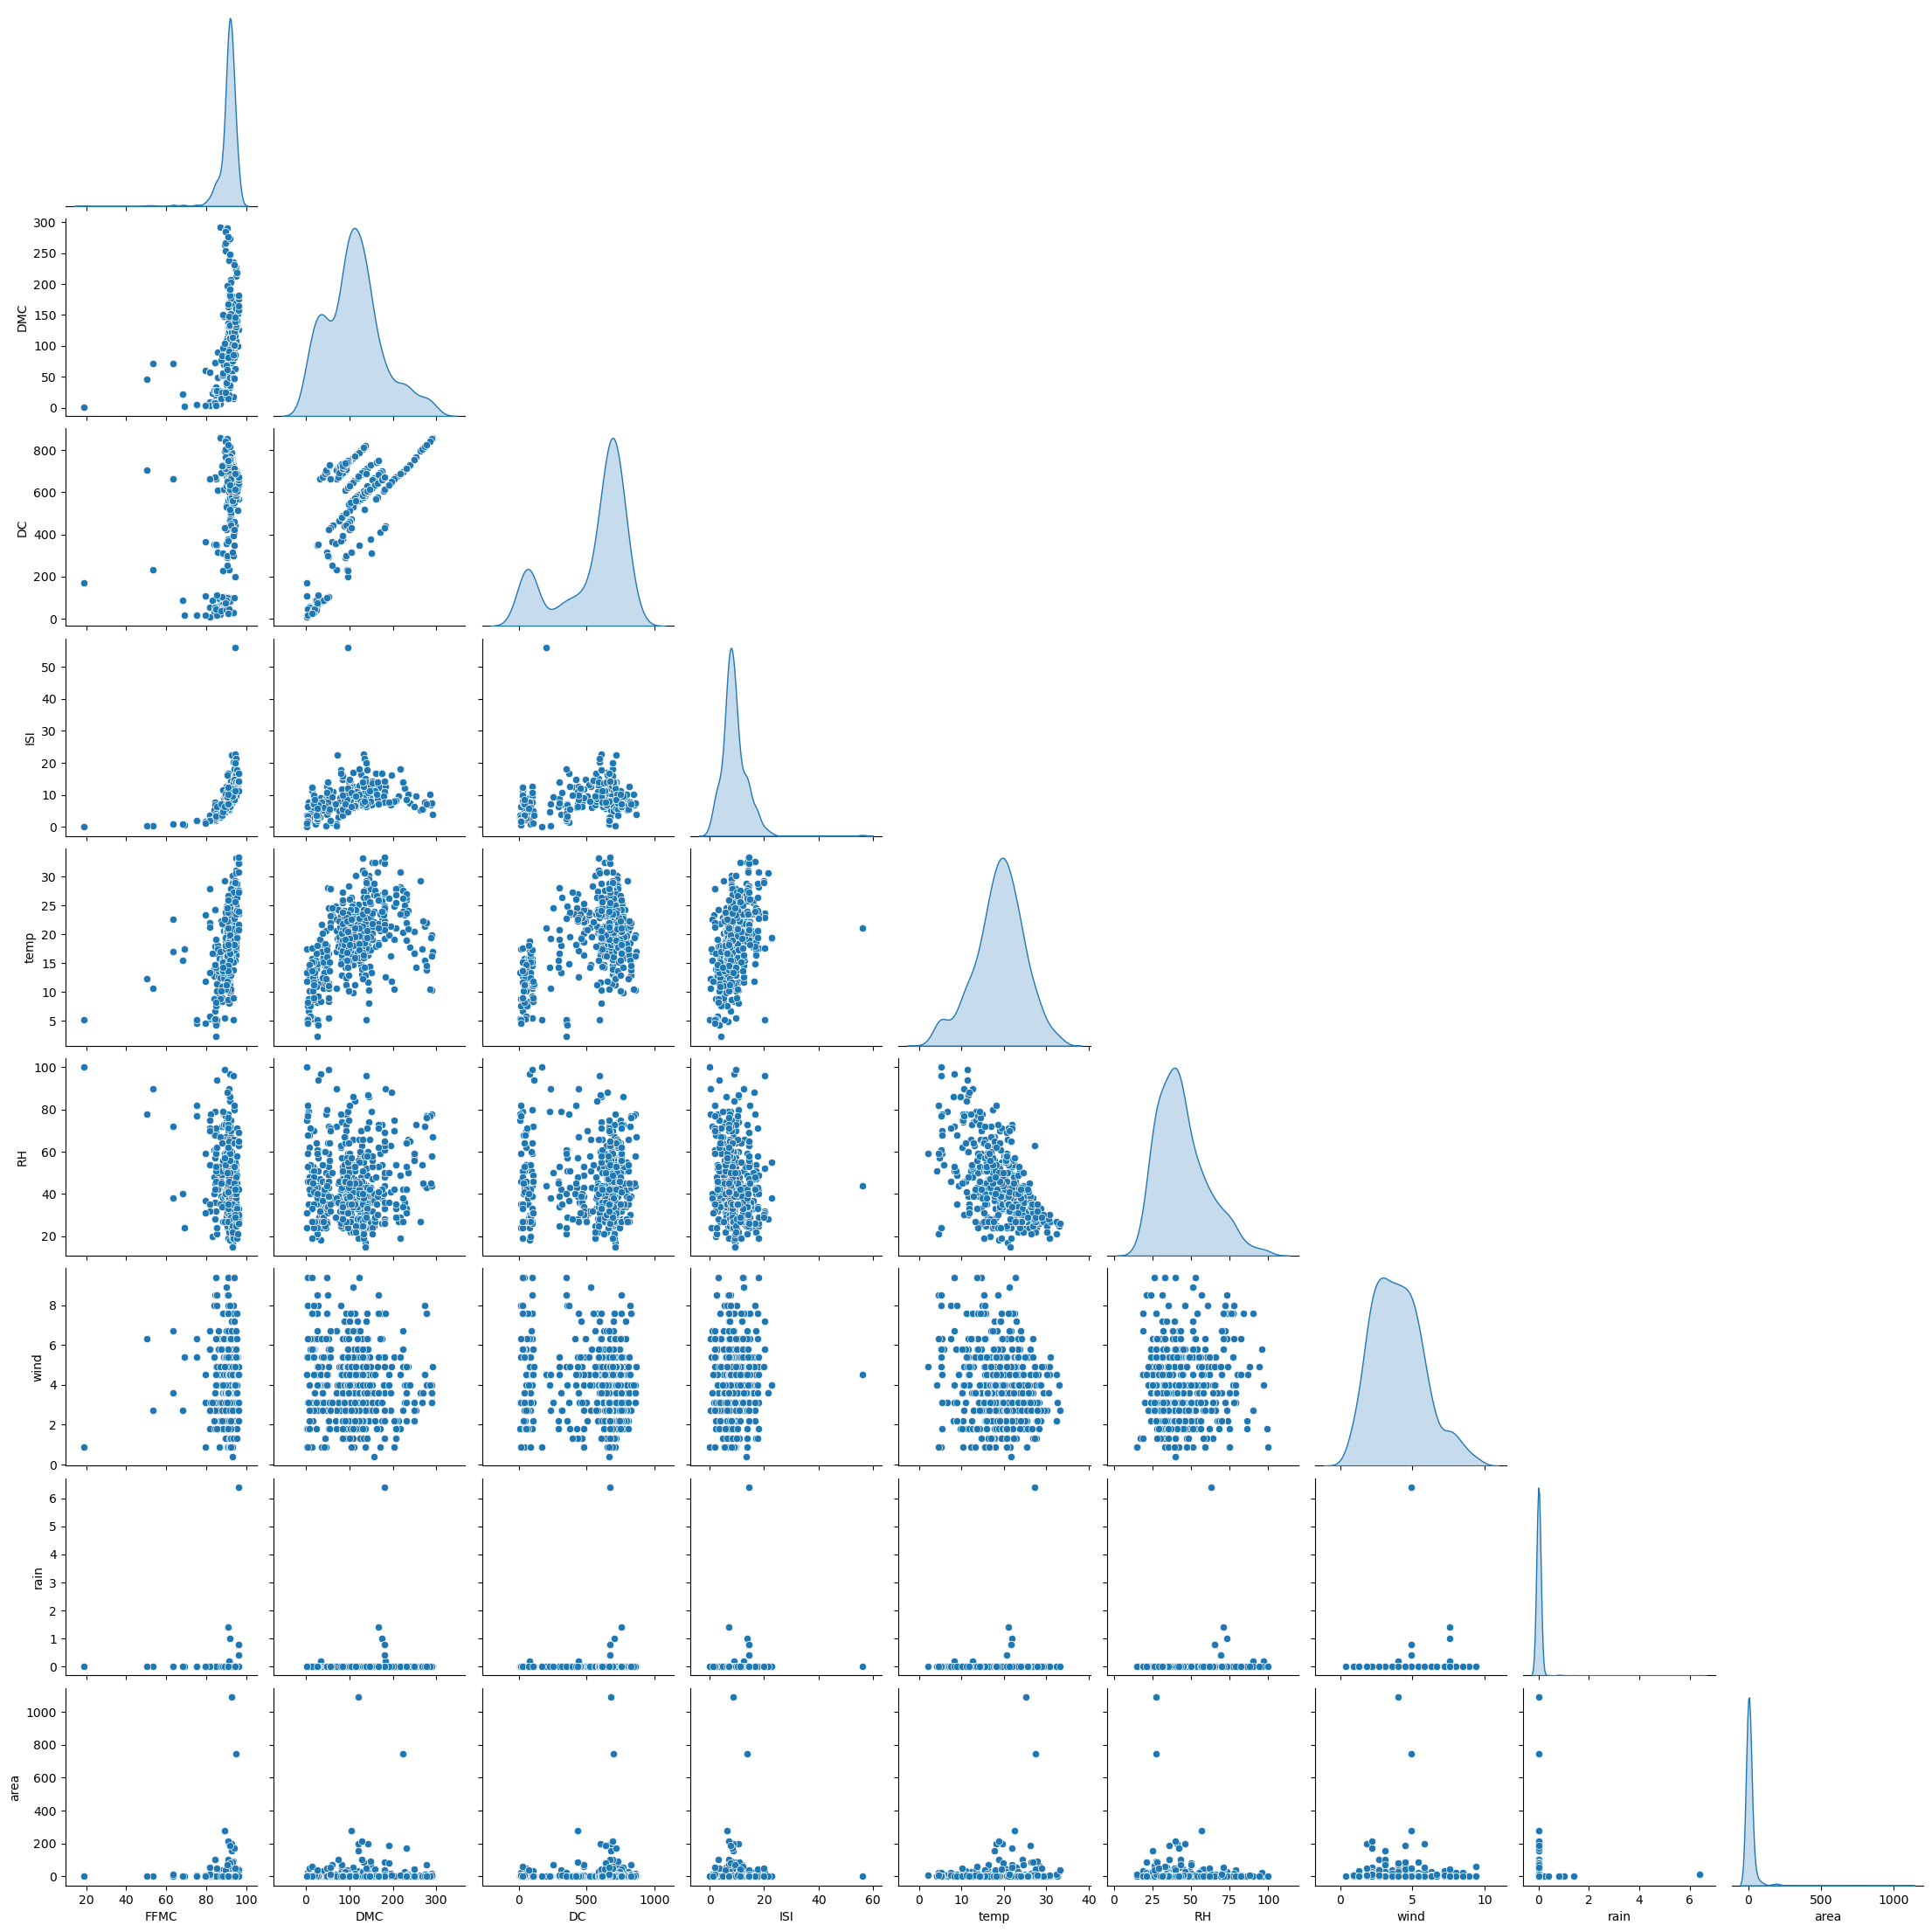

In [10]:
# Pairplot
sns.pairplot(Forest.iloc[:,0:9], corner = True, diag_kind = "kde")
# There is no corelation between the vari

<AxesSubplot:>

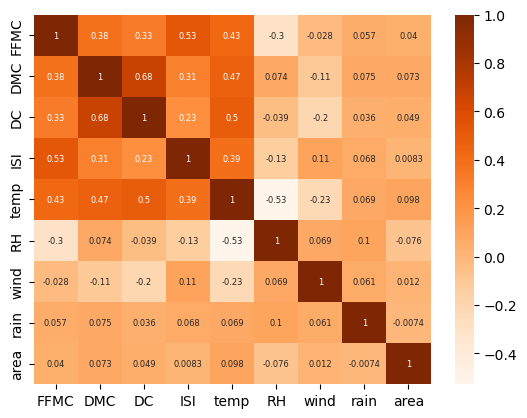

In [11]:
# Heat map and Correlation CoiForesticient
sns.heatmap(Forest.iloc[:,0:9].corr(), annot = True, annot_kws={"size": 6}, cmap = 'Oranges')

In [12]:
"""WE CAN OBSERVE FROM ABOVE HEATMAP THERE IS NO CORRELATION IN BETWEEN 
OUTPUT AND INPUT FEATURES.SO WE CAN'T ABLE TO GET PROPER RESULT WITH HELP 
OF THIS INPUT FEATURE ONLY."""

"WE CAN OBSERVE FROM ABOVE HEATMAP THERE IS NO CORRELATION IN BETWEEN \nOUTPUT AND INPUT FEATURES.SO WE CAN'T ABLE TO GET PROPER RESULT WITH HELP \nOF THIS INPUT FEATURE ONLY."

In [14]:
#DATA PRE PROCESSING:

#We dropped the day and month column.

#We normalized the data.

#We plotted the data in histogram, boxplot, pairplot and heatmap.

0.00      247
1.94        3
0.52        2
3.71        2
0.68        2
         ... 
105.66      1
154.88      1
196.48      1
200.94      1
11.16       1
Name: area, Length: 251, dtype: int64

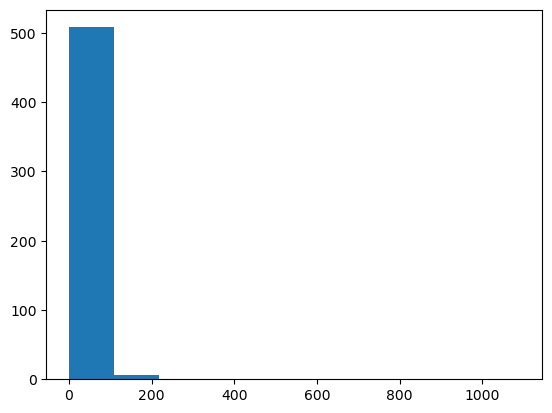

In [15]:
##################################### - Splitting data - ############################################

# Splitting in X and y
X = Forest.drop(['area', "size_category"],axis=1)
y = Forest['area']
plt.hist(y)
Forest.area.value_counts()

In [17]:
# Splitting in Train and Test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)

In [18]:
######################################### - Fitting Model- ##########################################
# Fitting SVM Model
model = SVR(kernel = 'rbf', gamma = 1, epsilon = 0.01)
model.fit(X_train,y_train)

SVR(epsilon=0.01, gamma=1)

In [19]:
# Accuracy of Model on Train and Test data
model.score(X_train,y_train)
model.score(X_test,y_test)

-0.04148478750407825

In [20]:
# Predication Train data and Test data
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [21]:
# RMSE Train data and Test data
rmse_train = np.sqrt(np.mean((pred_train-y_train)**2))
rmse_test = np.sqrt(np.mean((pred_test-y_test)**2))

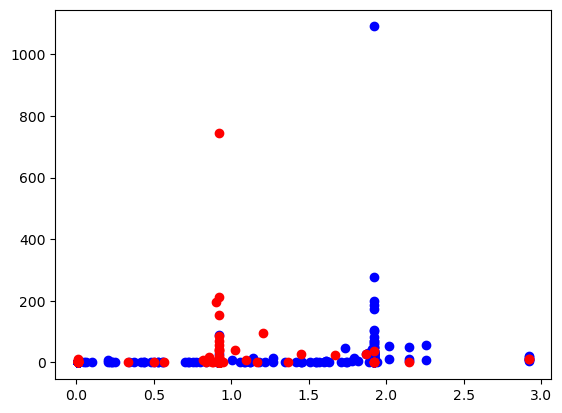

In [22]:
# Visualising Train data and Test data
plt.plot(pred_train,y_train,"bo")
plt.plot(pred_test,y_test,"ro")

In [ ]:
#**Solution:**
#The prediction on the train and test data plotted in the sctterplot shows 
#that the area predicted is comparatively less than the area in the 
#historical forest fire .